<a href="https://colab.research.google.com/github/zzhining/text_data_analysis/blob/main/naver_movie_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
- 데이터 출처: https://github.com/e9t/nsmc/

In [1]:
import pandas as pd

# 데이터가 저장되어있는 repository에서 곧장 불러옴, 구분자(tab)
df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/refs/heads/master/ratings_train.txt', sep = '\t')
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# EDA

In [2]:
# shape
df.shape

(150000, 3)

In [3]:
# null
df.isnull().sum()

,0
id,0
document,5
label,0


In [5]:
df[df['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [6]:
df.dropna(inplace = True)

In [7]:
df.shape

(149995, 3)

In [8]:
# label 분포
df['label'].value_counts()

,count
label,
0,75170
1,74825


<Axes: xlabel='len', ylabel='Count'>

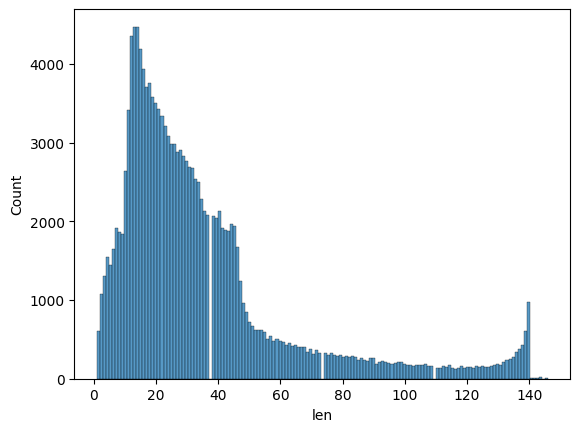

In [13]:
import seaborn as sns
# 텍스트 길이
df['len'] = df['document'].str.len()
sns.histplot(df['len'])

일반적으로 사용자는 20~30글자 사이의 댓글을 가장 많이 다는 것을 알 수 있었다. 추후 신경망을 사용하여 학습하기 위해, 글자수를 특정 값 기준으로 잘라주어야할 경우, 60 글자 정도 수준에서 분할을 하여 처리를 할 예정이다.

In [14]:
# 워드 클라우드
import matplotlib.pyplot as plt
from wordcloud import WordCloud

!apt-get install -y fonts-nanum
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

text = """
"""


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.3 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [38]:
# negative
negative_text = df[df['label'] == 0]['document']
# positive
positive_text = df[df['label'] == 1]['document']

In [39]:
# Dataframe 구조의 문자를 문자열 형태로 변환
negative_text = ' '.join(negative_text.astype(str))
positive_text = ' '.join(positive_text.astype(str))

In [ ]:
pip install konlpy

In [ ]:
# 각 문자열에서 명사만 추출
from konlpy.tag import Okt
okt = Okt()
negative_nouns = okt.nouns(negative_text)
positive_nouns = okt.nouns(positive_text)

In [26]:
# 추출한 명사에서 각 명사가 몇 번 등장했는지 확인
from collections import Counter # 특정 단어가 몇번 등장했는지 딕셔너리 타입으로 반환(예: {"key", 50})
negative_counts = Counter(negative_nouns)
positive_counts = Counter(positive_nouns)

In [ ]:
# 자주 등장한(예. 50번 이상 등장한) 단어에 대해서만 워드 클라우드 생성
top_50_negative = negative_counts.most_common(50) # 특정 빈도수 이상 나타난 단어들을 반환
top_50_positive = positive_counts.most_common(50)

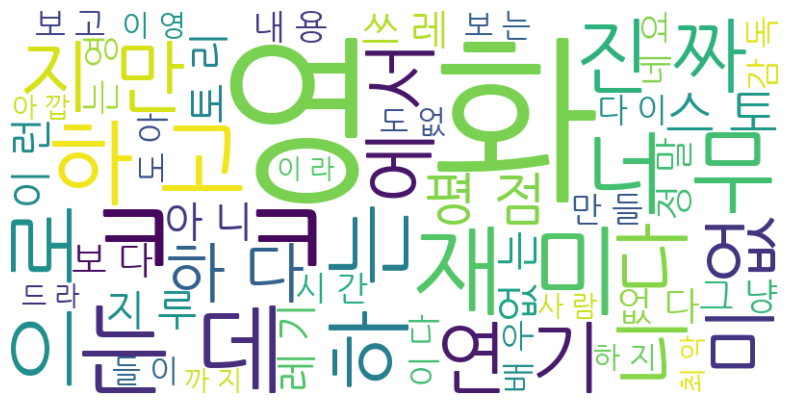

In [23]:
wordcloud = WordCloud(font_path=font_path,
                      width=800,
                      height=400,
                      background_color='white').generate_from_frequencies(top_50_negative) # 빈도수에 따라 워드 클라우드 생성

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dir(WordCloud)